<a href="https://colab.research.google.com/github/icaglar33/finalproject/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
exit_entry_data = pd.read_excel("/content/drive/MyDrive/project data/entry_exit_data.xlsx")

exit_entry_data.head()
exit_entry_data.info()
exit_entry_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 11 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Date                                                        80 non-null     object 
 1   Number of active employer businesses in the private sector  80 non-null     int64  
 2   Number of entrants                                          76 non-null     float64
 3   Number of exits                                             80 non-null     int64  
 4   Entry rate                                                  76 non-null     float64
 5   Exit rate                                                   80 non-null     float64
 6   Employment                                                  80 non-null     int64  
 7   Gross employment creation by entrants                       76 non-null     float64
 8   Gr

,Number of active employer businesses in the private sector,Number of entrants,Number of exits,Entry rate,Exit rate,Employment,Gross employment creation by entrants,Gross employment destruction by exits,Employment creation rate by entries,Employment destruction rate by exits
count,8.000000e+01,76.000000,80.000000,76.000000,80.000000,8.000000e+01,76.000000,80.00000,76.000000,80.000000
mean,1.030667e+06,138037.894737,122452.625000,13.375789,11.940125,1.163842e+07,207263.026316,174654.00000,1.798026,1.532625
std,7.824214e+04,7992.684208,5360.143523,1.074290,0.637488,8.684885e+05,39647.409365,42662.82862,0.457369,0.492734
min,8.884000e+05,115380.000000,109860.000000,10.650000,11.020000,9.956320e+06,150250.000000,130480.00000,1.220000,1.070000
25%,9.646100e+05,134622.500000,119192.500000,12.547500,11.430000,1.110386e+07,177477.500000,147790.00000,1.440000,1.210000
50%,1.046420e+06,138805.000000,123585.000000,13.140000,11.730000,1.165222e+07,185775.000000,152280.00000,1.555000,1.305000
75%,1.100228e+06,144282.500000,125992.500000,14.210000,12.377500,1.226843e+07,247885.000000,189040.00000,2.295000,1.635000
max,1.140960e+06,155230.000000,134170.000000,15.310000,13.670000,1.321410e+07,294320.000000,291160.00000,2.750000,2.920000


Data cleaning (Handling missing values)


In [3]:
missing_values_entry_exit = exit_entry_data.isnull().sum()
print(missing_values_entry_exit)

Date                                                          0
Number of active employer businesses in the private sector    0
Number of entrants                                            4
Number of exits                                               0
Entry rate                                                    4
Exit rate                                                     0
Employment                                                    0
Gross employment creation by entrants                         4
Gross employment destruction by exits                         0
Employment creation rate by entries                           4
Employment destruction rate by exits                          0
dtype: int64


In [4]:
columns_with_missing_data = exit_entry_data.columns[exit_entry_data.isnull().any()]

for column in columns_with_missing_data:
    mean_value = exit_entry_data[column].mean()
    exit_entry_data[column].fillna(mean_value, inplace=True)

print(exit_entry_data.head())

      Date  Number of active employer businesses in the private sector  \
0  Q1 2000                                             888400            
1  Q2 2000                                             892900            
2  Q3 2000                                             899900            
3  Q4 2000                                             897500            
4  Q1 2001                                             902720            

   Number of entrants  Number of exits  Entry rate  Exit rate  Employment  \
0       138037.894737           121480   13.375789      13.67     9956320   
1       138037.894737           116970   13.375789      13.13    10061210   
2       138037.894737           119660   13.375789      13.35    10113390   
3       138037.894737           109860   13.375789      12.22    10258430   
4       130600.000000           112850   14.510000      12.54    10307300   

   Gross employment creation by entrants  \
0                          207263.026316   
1   

In [5]:
unemployment_data = pd.read_excel('/content/drive/MyDrive/project data/unemployment_data.xlsx')
unemployment_data.head()
unemployment_data.info()
unemployment_data.describe()
missing_data = unemployment_data.isnull().sum()
print(missing_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               94 non-null     object 
 1   Unemployment Rate  94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
Date                 0
Unemployment Rate    0
dtype: int64


In [6]:
unemployment_data = pd.DataFrame(unemployment_data)
unemployment_data['Date'] = pd.to_datetime(unemployment_data['Date'])

unemployment_data.set_index('Date', inplace=True)
unemployment_quarterly = unemployment_data.resample('Q').mean()
unemployment_quarterly.reset_index(inplace=True)

unemployment_quarterly['Date'] = unemployment_quarterly['Date'].dt.to_period("Q").dt.start_time


In [7]:
interest_rate_data = pd.read_excel('/content/drive/MyDrive/project data/interest_rate_data.xlsx')
interest_rate_data.head()
interest_rate_data.info()
interest_rate_data.describe()
missing_data = interest_rate_data.isnull().sum()
print(missing_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     94 non-null     object 
 1   Long Term Interest Rate  94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
Date                       0
Long Term Interest Rate    0
dtype: int64


In [8]:
interest_rate_data = pd.DataFrame(interest_rate_data)
interest_rate_data['Date'] = pd.to_datetime(interest_rate_data['Date'])

interest_rate_data['Date'] = interest_rate_data['Date'].dt.to_period("Q").dt.start_time
print(interest_rate_data)

         Date  Long Term Interest Rate
0  2000-01-01                 6.286111
1  2000-04-01                 6.011555
2  2000-07-01                 5.786455
3  2000-10-01                 5.617527
4  2001-01-01                 5.383333
..        ...                      ...
89 2022-04-01                 2.979342
90 2022-07-01                 3.008697
91 2022-10-01                 3.162730
92 2023-01-01                 3.035103
93 2023-04-01                 3.097703

[94 rows x 2 columns]


In [9]:
gdp_data = pd.read_excel('/content/drive/MyDrive/project data/gdp_data.xlsx')
gdp_data.head()
gdp_data.info()
gdp_data.describe()
missing_data = gdp_data.isnull().sum()
print(missing_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Date                                     94 non-null     object
 1   Final consumption expenditure            94 non-null     int64 
 2   Household final consumption expenditure  94 non-null     int64 
 3   Goods                                    94 non-null     int64 
 4   Services                                 94 non-null     int64 
 5   Exports of goods and services            94 non-null     int64 
 6   Less: imports of goods and services      94 non-null     int64 
 7   Gross domestic product at market prices  94 non-null     int64 
 8   Final domestic demand                    94 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 6.7+ KB
Date                                       0
Final consumption expenditure              0

In [10]:
print(gdp_data.columns)

Index(['Date', 'Final consumption expenditure',
       'Household final consumption expenditure', 'Goods', 'Services',
       'Exports of goods and services', 'Less: imports of goods and services',
       'Gross domestic product at market prices', 'Final domestic demand'],
      dtype='object')


In [11]:
cpi_data = pd.read_excel('/content/drive/MyDrive/project data/cpi_data.xlsx')
cpi_data.head()
cpi_data.info()
cpi_data.describe()
missing_data = cpi_data.isnull().sum()
print(missing_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            284 non-null    datetime64[ns]
 1   Inflation Rate  284 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB
Date              0
Inflation Rate    0
dtype: int64


In [12]:
cpi_data['Date'] = pd.to_datetime(cpi_data['Date'])
cpi_data.set_index('Date', inplace=True)

quarterly_cpi_data = cpi_data["Inflation Rate"].resample('Q').mean()

def format_quarter(date):
    quarter = (date.month-1)//3 + 1  # calculate quarter
    return f"Q{quarter} {date.year}"

quarterly_cpi_data.index = quarterly_cpi_data.index.map(format_quarter)
print(quarterly_cpi_data.head())

Date
Q1 2000    1.666667
Q2 2000    1.633333
Q3 2000    1.833333
Q4 2000    1.966667
Q1 2001    2.333333
Name: Inflation Rate, dtype: float64


# **Data Integration**

In [13]:
def quarter_to_date(date_val):
    # If it's already a Timestamp, return it
    if isinstance(date_val, pd.Timestamp):
        return date_val

    # Split the quarter and year
    quarter, year = date_val.split()
    # Map quarters to months
    month_map = {
        'Q1': '01',
        'Q2': '04',
        'Q3': '07',
        'Q4': '10'
    }
    # Return as YYYY-MM-DD format
    return f"{year}-{month_map[quarter]}-01"

# Convert the columns:
exit_entry_data['Date'] = exit_entry_data['Date'].apply(quarter_to_date).astype('datetime64[ns]')
unemployment_quarterly['Date'] = unemployment_quarterly['Date'].apply(quarter_to_date).astype('datetime64[ns]')
interest_rate_data['Date'] = interest_rate_data['Date'].apply(quarter_to_date).astype('datetime64[ns]')
gdp_data['Date'] = gdp_data['Date'].apply(quarter_to_date).astype('datetime64[ns]')
if isinstance(quarterly_cpi_data, pd.DataFrame):
    quarterly_cpi_data['Date'] = quarterly_cpi_data['Date'].apply(quarter_to_date).astype('datetime64[ns]')



In [14]:
merged_data = exit_entry_data.merge(unemployment_quarterly, on='Date', how='outer') \
                             .merge(interest_rate_data, on='Date', how='outer') \
                             .merge(gdp_data, on='Date', how='outer')
if isinstance(quarterly_cpi_data, pd.DataFrame):
    merged_data = merged_data.merge(quarterly_cpi_data, on='Date', how='outer')

print(merged_data.head())


        Date  Number of active employer businesses in the private sector  \
0 2000-01-01                                           888400.0            
1 2000-04-01                                           892900.0            
2 2000-07-01                                           899900.0            
3 2000-10-01                                           897500.0            
4 2001-01-01                                           902720.0            

   Number of entrants  Number of exits  Entry rate  Exit rate  Employment  \
0       138037.894737         121480.0   13.375789      13.67   9956320.0   
1       138037.894737         116970.0   13.375789      13.13  10061210.0   
2       138037.894737         119660.0   13.375789      13.35  10113390.0   
3       138037.894737         109860.0   13.375789      12.22  10258430.0   
4       130600.000000         112850.0   14.510000      12.54  10307300.0   

   Gross employment creation by entrants  \
0                          207263.02

# **Data Formatting**

In [15]:
print(merged_data.dtypes)

Date                                                          datetime64[ns]
Number of active employer businesses in the private sector           float64
Number of entrants                                                   float64
Number of exits                                                      float64
Entry rate                                                           float64
Exit rate                                                            float64
Employment                                                           float64
Gross employment creation by entrants                                float64
Gross employment destruction by exits                                float64
Employment creation rate by entries                                  float64
Employment destruction rate by exits                                 float64
Unemployment Rate                                                    float64
Long Term Interest Rate                                              float64

In [16]:
# Renaming columns for clarity and consistency
merged_data.columns = [
    'Date', 'Active_Employer_Businesses', 'Number_Entrants', 'Number_Exits',
    'Entry_Rate', 'Exit_Rate', 'Employment', 'Employment_Creation_Entrants',
    'Employment_Destruction_Exits', 'Employment_Destruction_Rate_Exits', 'Net_Employment_Creation', 'Unemployment_Rate',
    'Long_Term_Interest_Rate', 'Final_Consumption', 'Household_Final_Consumption',
    'Goods', 'Services', 'Exports', 'Imports', 'GDP_Market_Prices', 'Final_Domestic_Demand'
]


# **Exploratory Data Analysis (EDA)**

In [17]:
print(merged_data.isnull().sum())

Date                                  0
Active_Employer_Businesses           14
Number_Entrants                      14
Number_Exits                         14
Entry_Rate                           14
Exit_Rate                            14
Employment                           14
Employment_Creation_Entrants         14
Employment_Destruction_Exits         14
Employment_Destruction_Rate_Exits    14
Net_Employment_Creation              14
Unemployment_Rate                     0
Long_Term_Interest_Rate               0
Final_Consumption                     0
Household_Final_Consumption           0
Goods                                 0
Services                              0
Exports                               0
Imports                               0
GDP_Market_Prices                     0
Final_Domestic_Demand                 0
dtype: int64


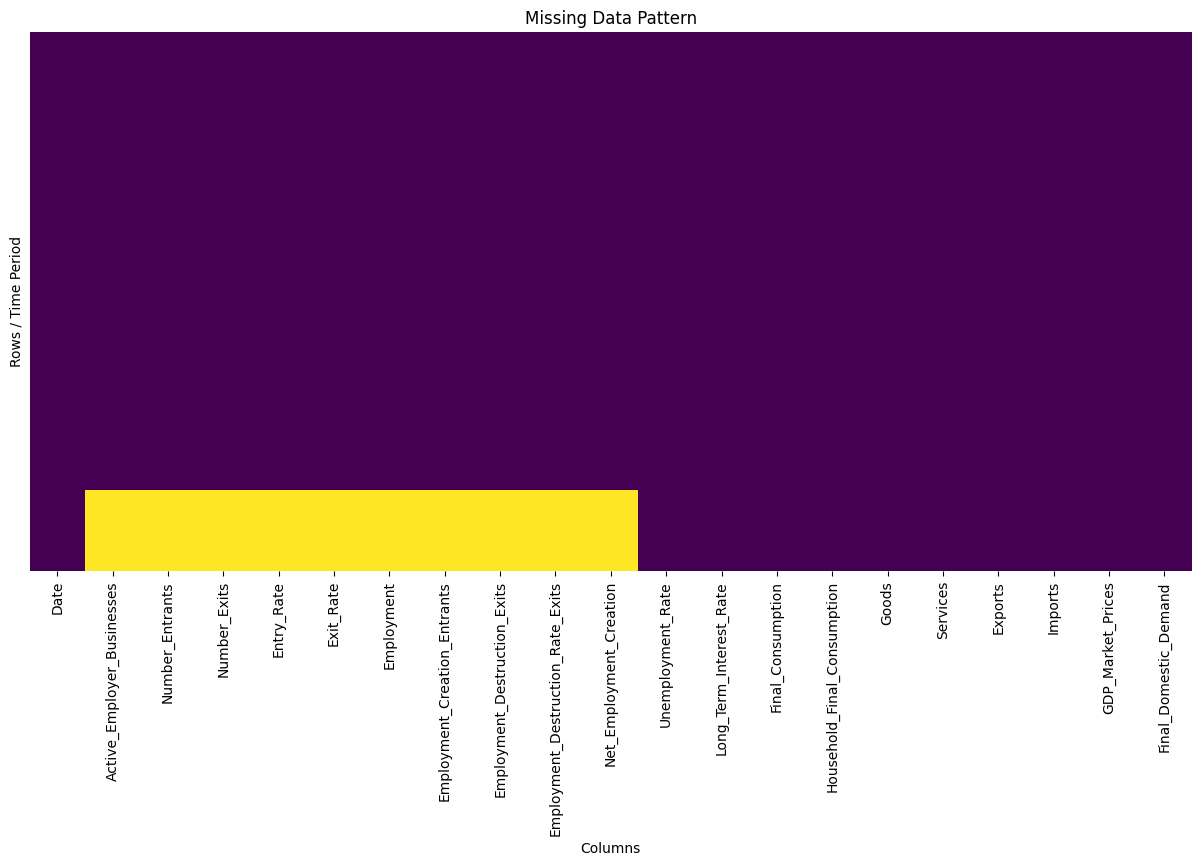

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.heatmap(merged_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Pattern')
plt.ylabel('Rows / Time Period')
plt.xlabel('Columns')
plt.show()


In [19]:
merged_data = merged_data[merged_data['Date'] <= '2019-12-01']

merged_data = merged_data.fillna(merged_data.mean())
print(merged_data)

         Date  Active_Employer_Businesses  Number_Entrants  Number_Exits  \
0  2000-01-01                    888400.0    138037.894737      121480.0   
1  2000-04-01                    892900.0    138037.894737      116970.0   
2  2000-07-01                    899900.0    138037.894737      119660.0   
3  2000-10-01                    897500.0    138037.894737      109860.0   
4  2001-01-01                    902720.0    130600.000000      112850.0   
..        ...                         ...              ...           ...   
75 2018-10-01                   1134110.0    147000.000000      125470.0   
76 2019-01-01                   1135810.0    146410.000000      127940.0   
77 2019-04-01                   1135640.0    141260.000000      126280.0   
78 2019-07-01                   1138080.0    144670.000000      125820.0   
79 2019-10-01                   1140960.0    142110.000000      125560.0   

    Entry_Rate  Exit_Rate  Employment  Employment_Creation_Entrants  \
0    13.375789  

<ipython-input-19-fb8ee4ade474>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  merged_data = merged_data.fillna(merged_data.mean())


In [20]:
print(merged_data.describe())

       Active_Employer_Businesses  Number_Entrants   Number_Exits  Entry_Rate  \
count                8.000000e+01        80.000000      80.000000   80.000000   
mean                 1.030667e+06    138037.894737  122452.625000   13.375789   
std                  7.824214e+04      7787.709453    5360.143523    1.046740   
min                  8.884000e+05    115380.000000  109860.000000   10.650000   
25%                  9.646100e+05    134697.500000  119192.500000   12.572500   
50%                  1.046420e+06    138485.000000  123585.000000   13.250000   
75%                  1.100228e+06    143335.000000  125992.500000   13.995000   
max                  1.140960e+06    155230.000000  134170.000000   15.310000   

       Exit_Rate    Employment  Employment_Creation_Entrants  \
count  80.000000  8.000000e+01                     80.000000   
mean   11.940125  1.163842e+07                 207263.026316   
std     0.637488  8.684885e+05                  38630.639804   
min    11.0200

In [ ]:
#Histograms
merged_data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

In [ ]:
#Time series plot
plt.plot(merged_data['Date'], merged_data['Unemployment_Rate'])
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.show()

In [ ]:
#Correlation matrix
correlation_matrix = merged_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()


Hypothesis Development: Based on your EDA, start formulating hypotheses about how the unemployment rate, employment trends, inflation, and GDP might influence business entry and exit rates.

Data Analysis: Proceed with your data analysis using appropriate statistical and machine learning techniques. This can include time series analysis, regression modeling, and predictive modeling to answer your research questions.

Interpretation: Interpret the results of your analysis and draw conclusions regarding the relationships between macroeconomic indicators and business dynamics.

Report Findings: Finally, present your findings in a clear and structured manner in your research paper, including data visualizations, tables, and statistical results.